**Credit Card Fraud Detection**

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, plot_roc_curve
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing the training dataset
train_data = pd.read_csv('/content/drive/MyDrive/capstone/fraudTrain.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
#importing the unseen test dataset
test_data = pd.read_csv('/content/drive/MyDrive/capstone/fraudTest.csv')
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0



**Exploratory Data Analysis**

In [ ]:
train_data.shape

(1296675, 23)

In [ ]:
test_data.shape

(555719, 23)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
# concanating the datasets for EDA
concat_df = pd.concat([train_data,test_data],axis=0)
concat_df.shape

(1852394, 23)

**Checking for the class imbalance in train data**

In [ ]:
frauds=train_data['is_fraud'].value_counts()
nonfraud_count=frauds[0]/train_data['is_fraud'].count()*100
fraud_count=frauds[1]/train_data['is_fraud'].count()*100

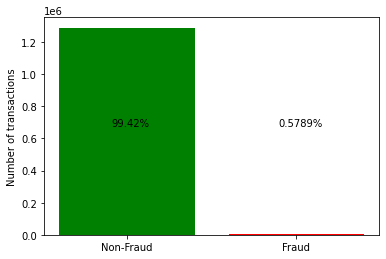

In [ ]:
plt.bar(['Non-Fraud','Fraud'], frauds, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(nonfraud_count),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_count),(0.7, 0.5), xycoords='axes fraction')
plt.show()

**Considering a fraction of it to run faster as the collab is crashing**

In [ ]:
df_train= train_data.sample(frac = 0.05,random_state=1)
df_test= test_data.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)

(64834, 23) (27786, 23)


In [ ]:
frauds=df_train['is_fraud'].value_counts()
nonfraud_count=frauds[0]/df_train['is_fraud'].count()*100
fraud_count=frauds[1]/df_train['is_fraud'].count()*100

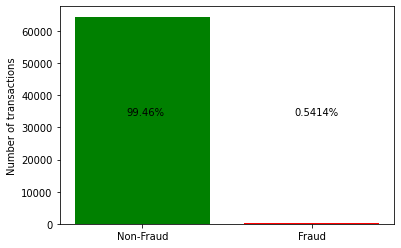

In [ ]:
plt.bar(['Non-Fraud','Fraud'], frauds, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(nonfraud_count),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_count),(0.7, 0.5), xycoords='axes fraction')
plt.show()

**Check for null values in the dataset**

In [ ]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Correlation matrix**

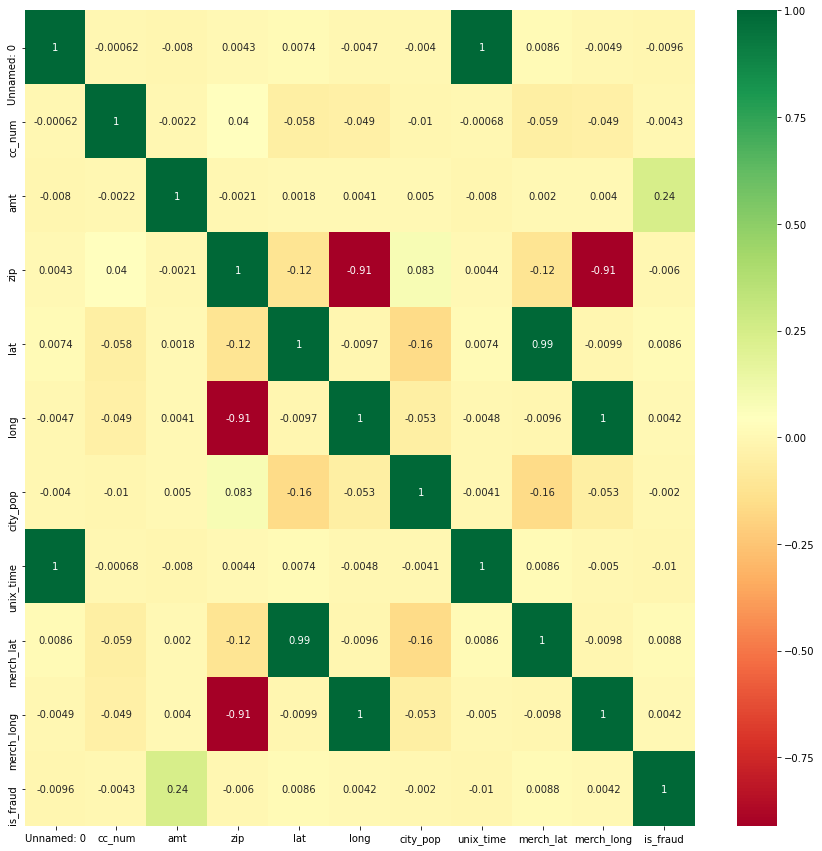

In [ ]:
#get correlations of each features in dataset
corrmat = df_train.corr() 
plt.figure(figsize=(15,15))

#plot heat map
sns.heatmap(df_train[corrmat.index].corr(),annot=True,cmap="RdYlGn")

From the correlation matrix it can be seen that there is a more or less significant correlation between "is_fraud" and "amt" column. The correlation among other variables are not of any significance as such.

**Visualising categorical variables**

For Merchant

In [ ]:
top= pd.DataFrame(concat_df.groupby('merchant')['is_fraud'].sum())
top = top.sort_values(by=['is_fraud'], ascending= [False]).head(5)
top

,is_fraud
merchant,
fraud_Kilback LLC,62
fraud_Kozey-Boehm,60
fraud_Rau and Sons,60
fraud_Doyle Ltd,57
fraud_Terry-Huel,56


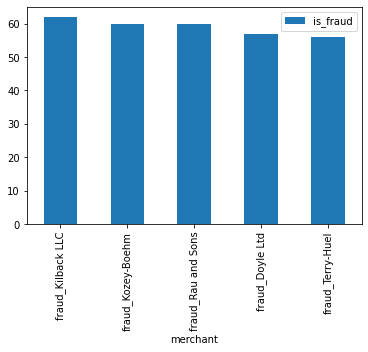

In [ ]:
# Write your code for plotting number of voted users vs decade
top.plot.bar()

The 5 merchants via which most of the fraudulent transactions take place are: fraud_Kilback LLC, fraud_Kozey-Boehm, fraud_Rau and Sons, fraud_Doyle Ltd and fraud_Terry-Huel. So any transactions through these merchants needs to be monitored carefully.

For Category

In [ ]:
top_cat= pd.DataFrame(concat_df.groupby('category')['is_fraud'].sum())
top_cat = top_cat.sort_values(by=['is_fraud'], ascending= [False]).head(5)
top_cat

,is_fraud
category,
grocery_pos,2228
shopping_net,2219
misc_net,1182
shopping_pos,1056
gas_transport,772


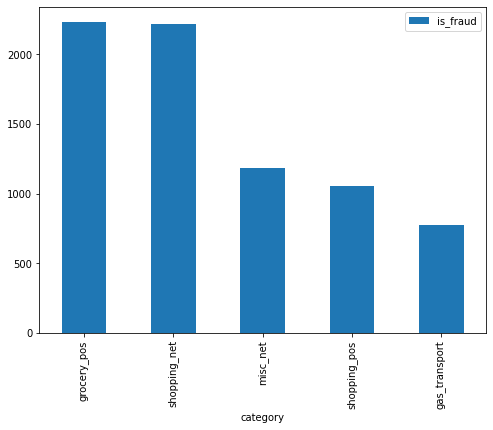

In [ ]:
# Write your code for plotting number of voted users vs decade
top_cat.plot.bar()

The most infamous transaction category where fraudulent transactions take place are: grocery_pos, shopping_net, misc_net, shopping_pos and gas_transport. So we have to be aware of any suspicious transaction for these categories.

For Gender

In [ ]:
gen= pd.DataFrame(concat_df.groupby('gender')['is_fraud'].sum())
gen

,is_fraud
gender,
F,4899
M,4752


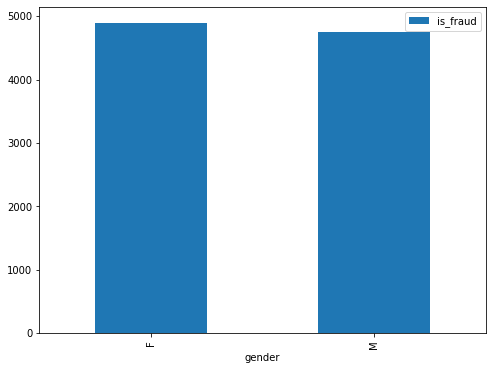

In [ ]:
# Write your code for plotting number of voted users vs decade
gen.plot.bar()

The above plot shows that female are at slightly higher fraudulent transaction than the male.

For Street

In [ ]:
top_st= pd.DataFrame(concat_df.groupby('street')['is_fraud'].sum())
top_st = top_st.sort_values(by=['is_fraud'], ascending= [False]).head(5)
top_st

,is_fraud
street,
00315 Ashley Valleys,19
15315 Vaughn Park Suite 356,19
5205 Annette Islands Apt. 043,19
0374 Courtney Islands Apt. 400,18
444 Robert Mews,18


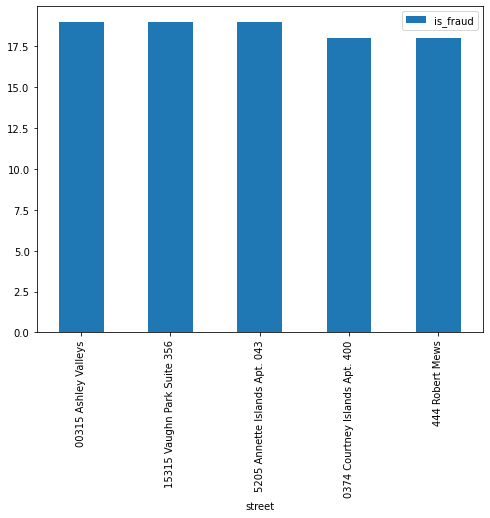

In [ ]:
# Write your code for plotting number of voted users vs decade
top_st.plot.bar()

The above plot shows the streets where the people do fraudulent transactions the most. 

For City

In [ ]:
top_cty= pd.DataFrame(concat_df.groupby('city')['is_fraud'].sum())
top_cty = top_cty.sort_values(by=['is_fraud'], ascending= [False]).head(5)
top_cty

,is_fraud
city,
Dallas,39
Houston,39
Birmingham,36
New York City,35
Allentown,34


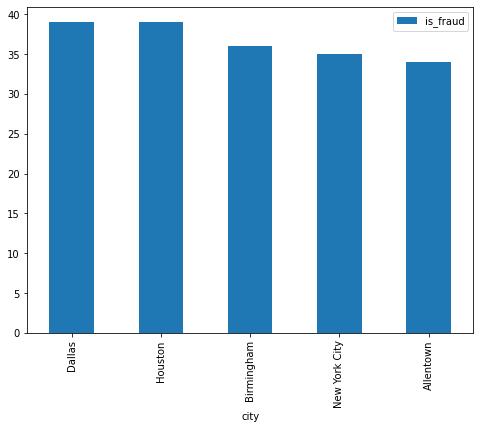

In [ ]:
# Write your code for plotting number of voted users vs decade
top_cty.plot.bar()

Dallas and Houston in Texas, NY city in NY and AllenTown of Pennsylvania are the cities with the most number of fraudulent transactions.

For State

In [ ]:
top_state= pd.DataFrame(concat_df.groupby('state')['is_fraud'].sum())
top_state = top_state.sort_values(by=['is_fraud'], ascending= [False]).head(5)
top_state

,is_fraud
state,
NY,730
TX,592
PA,572
CA,402
OH,360


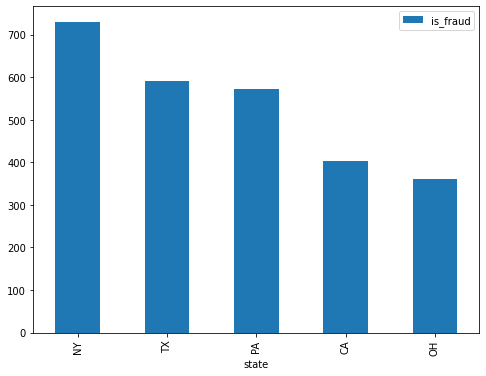

In [ ]:
# Write your code for plotting number of voted users vs decade
top_state.plot.bar()

New York has the highest number of fraudulent transaction, followed by texas and Pennsylvania

For Job

In [ ]:
top_job= pd.DataFrame(concat_df.groupby('job')['is_fraud'].sum())
top_job = top_job.sort_values(by=['is_fraud'], ascending= [False]).head(5)
top_job

,is_fraud
job,
Quantity surveyor,69
Naval architect,66
Materials engineer,62
Audiological scientist,58
Senior tax professional/tax inspector,57


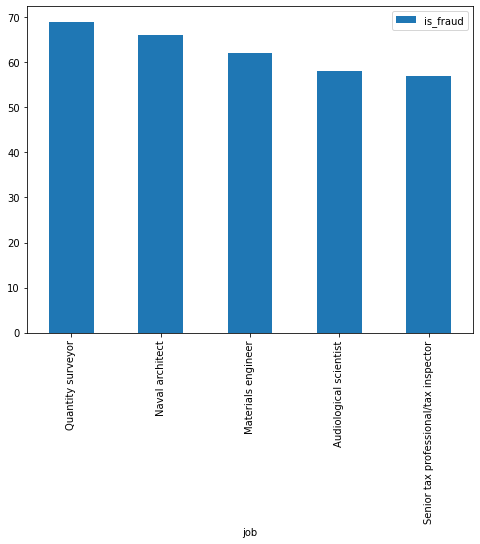

In [ ]:
# Write your code for plotting number of voted users vs decade
top_job.plot.bar()

Fraudsters target the People of the profession of Quantity surveyor, Naval architect, Materials engineer, Audiological scientist and Senior tax professional/ inspector .

In [ ]:
#Checking the column 'merchant'
concat_df['merchant'].value_counts(dropna = False)

fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: merchant, Length: 693, dtype: int64

In [ ]:
#checking the column 'category'
concat_df['category'].value_counts(dropna = False)

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [ ]:
#checking the column 'city'
concat_df['city'].value_counts(dropna = False)

Birmingham     8040
San Antonio    7312
Utica          7309
Phoenix        7297
Meridian       7289
               ... 
Chattanooga       7
Norfolk           7
Vacaville         7
Claypool          7
Wever             6
Name: city, Length: 906, dtype: int64

In [ ]:
#checking the column 'job'
concat_df['job'].value_counts(dropna = False)

Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Engineer, water                   8
Veterinary surgeon                8
Warehouse manager                 7
Ship broker                       7
Contracting civil engineer        7
Name: job, Length: 497, dtype: int64

In [ ]:
#checking the column 'street'
concat_df['street'].value_counts(dropna = False)

444 Robert Mews               4392
908 Brooks Brook              4392
03512 Jackson Ports           4386
5796 Lee Coves Apt. 286       4386
320 Nicholson Orchard         4386
                              ... 
300 Hodge Loaf                   7
7065 Whitney Mountains           7
3437 Ross Flat Apt. 592          7
7281 Joshua Mills Apt. 077       7
007 Tonya Isle Suite 299         6
Name: street, Length: 999, dtype: int64

In [ ]:
#checking the column 'state'
concat_df['state'].value_counts(dropna = False)

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: state, dtype: int64

**Visualising numerical variables**

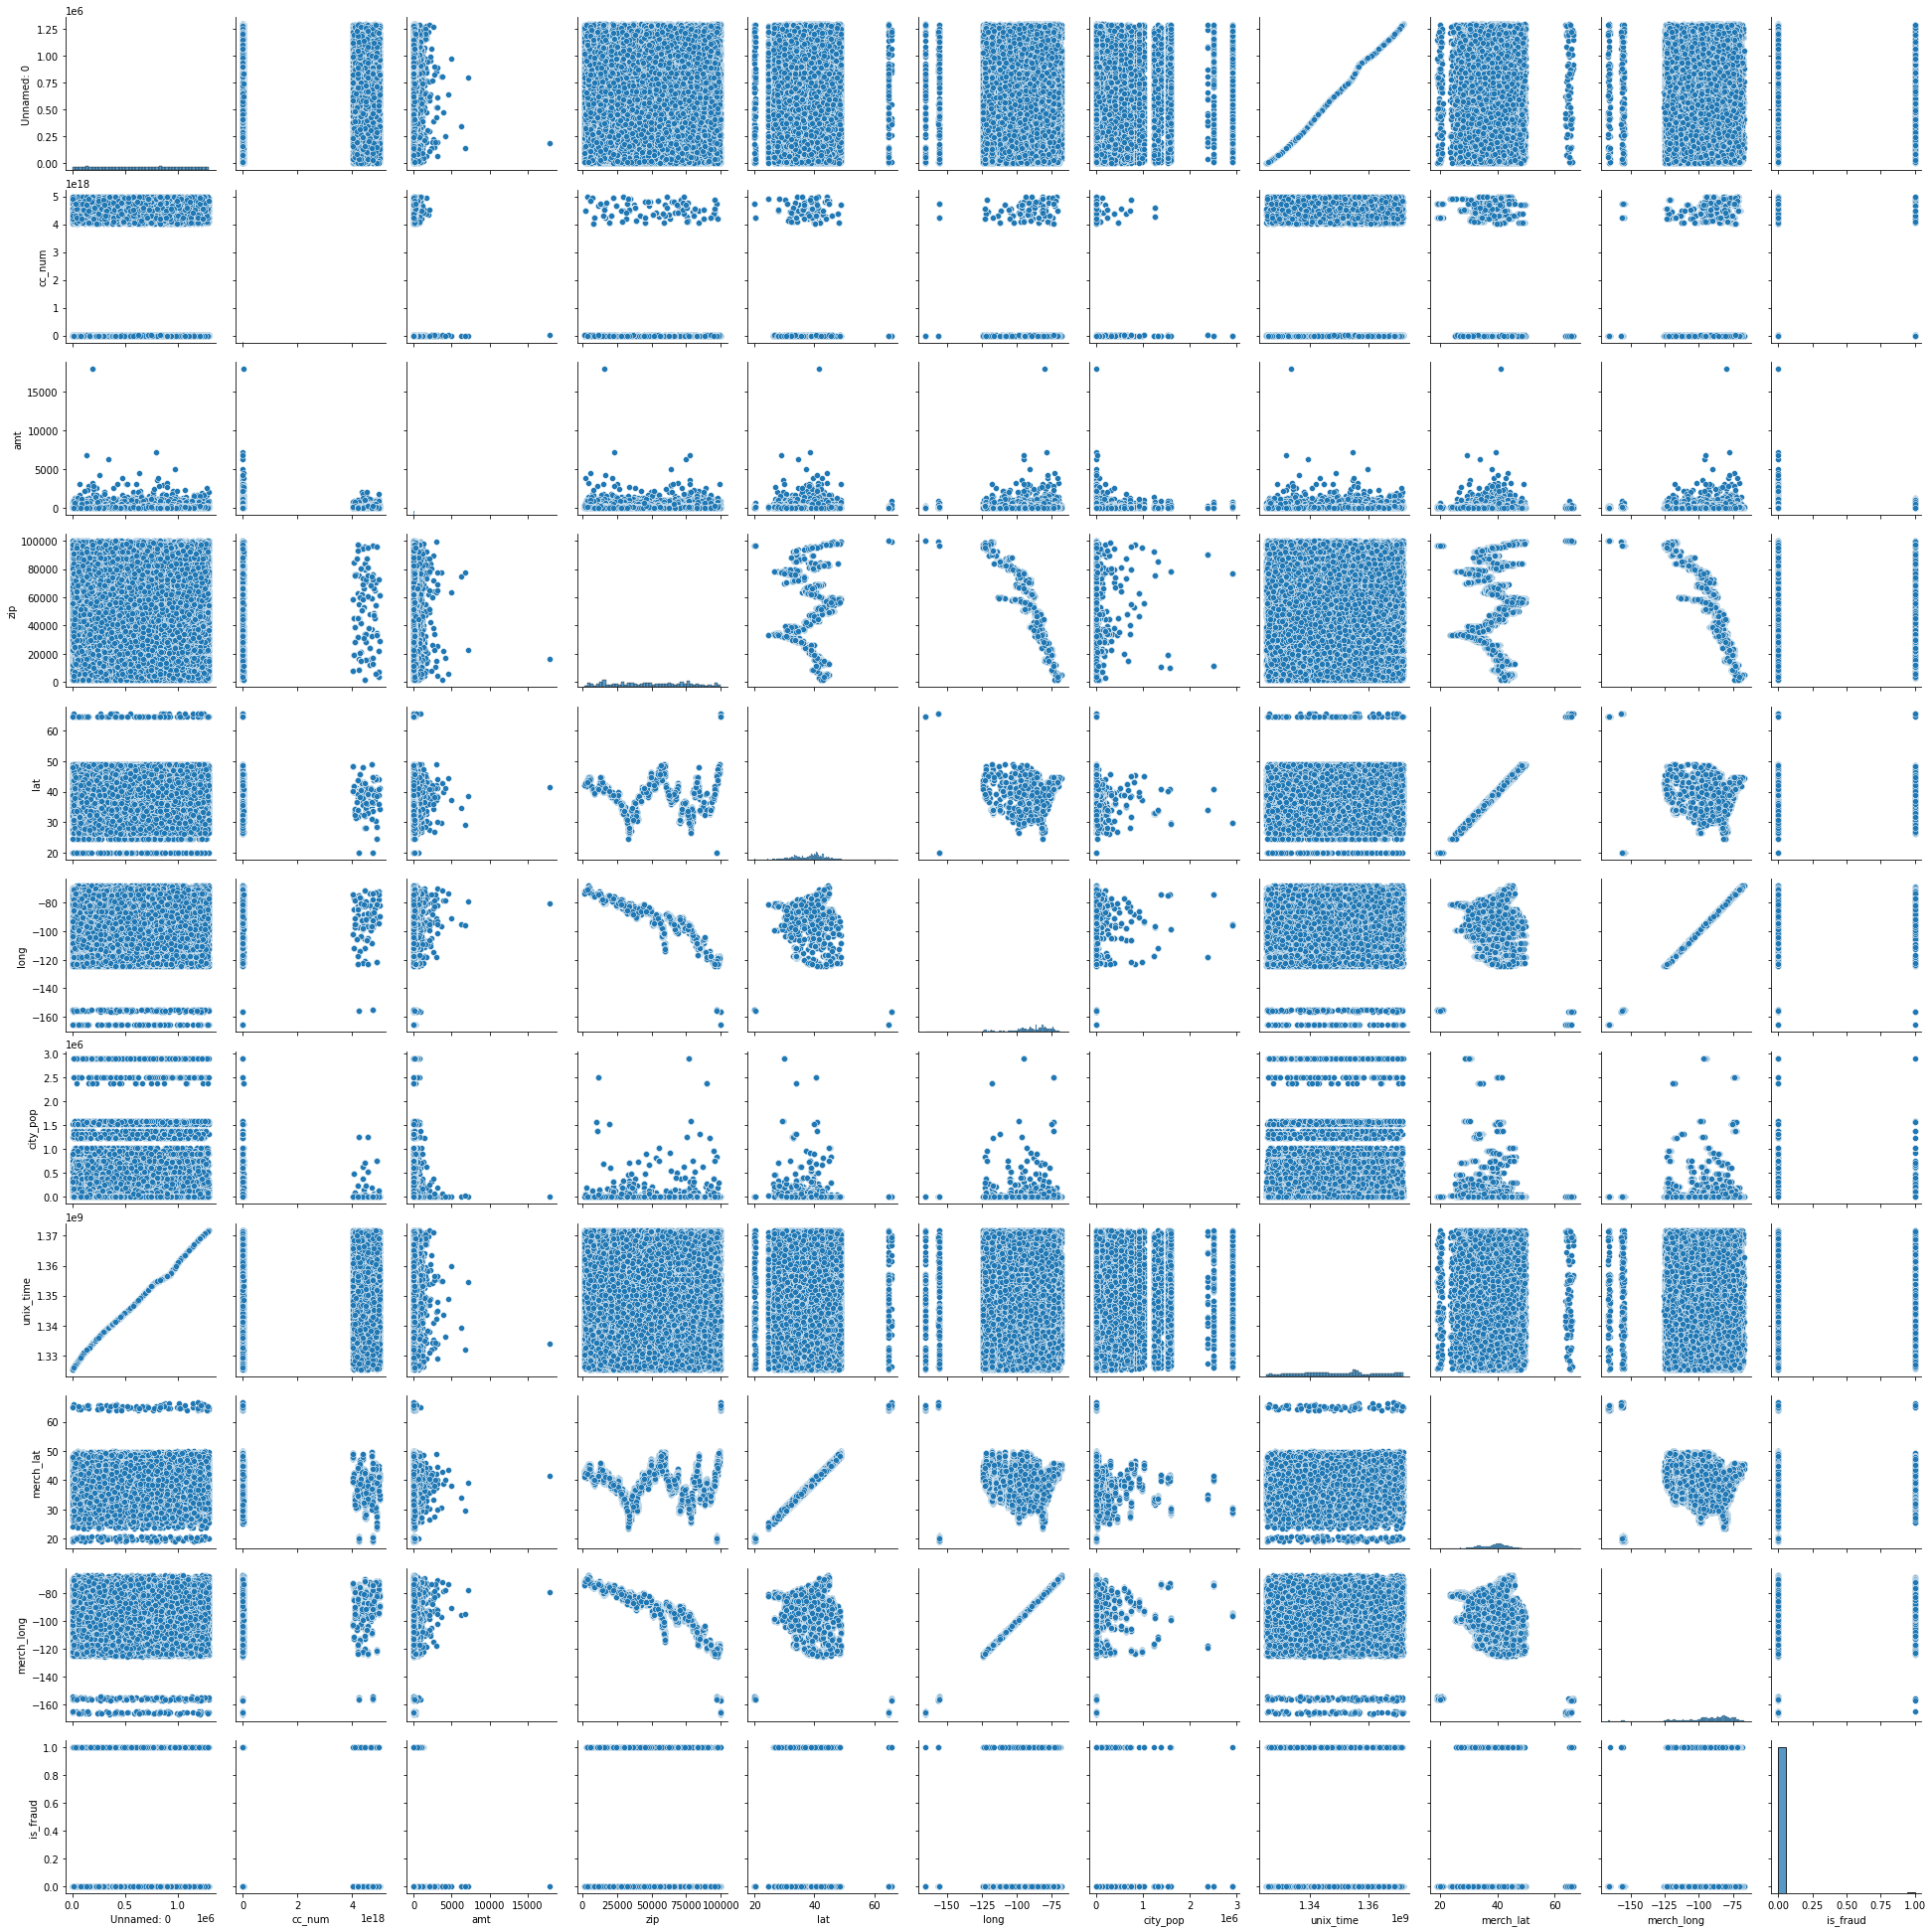

In [ ]:
sns.pairplot(concat_df)
plt.show()

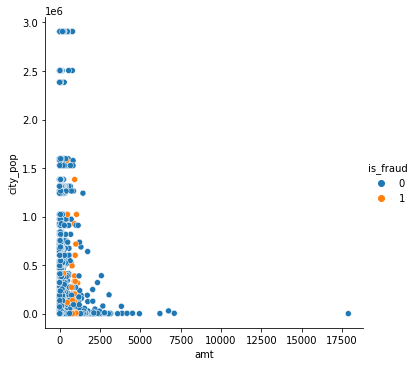

In [ ]:
sns.relplot(y = 'city_pop', x = 'amt' , hue = 'is_fraud',data = df_train)

This shows imbalance in data.

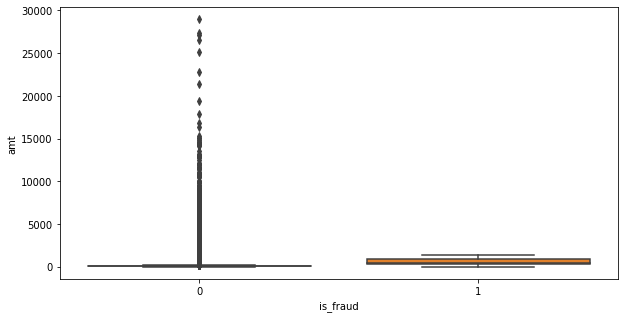

In [7]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'is_fraud', y = 'amt', data = concat_df)
plt.show()

It can be seen that fraud transaction amount is in the rane les than 2500.

**Data Preparation**

Dropping the columns that are not needed:

*   The **Untitled_0** column contains the indices and hence can be dropped.
*   **cc_num** containing the credit card number is not useful
*   **first** and **last** name can also be dropped
*   **trans_num** with the transaction number can be dropped as well
*   **trans_date_trans_time** column can be dropped as we can't classify any transaction as fraud using that because since its a credit card the transaction can take place in any countries where the time zone is different and analysing this wrt time becomes irrelevant.
*   **dob** column will be removed later after extracting the age





In [ ]:
# function to drop tbe columns
def Col_drop(data):
    col_to_drop = ['Unnamed: 0','trans_date_trans_time','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res

In [ ]:
# dropping the columns
# On the train data set
df_train = Col_drop(df_train)
# On the test data set
df_test = Col_drop(df_test)

print ( df_train.shape, df_test.shape)

(64834, 17) (27786, 17)


**Converting the dob column to age**

In [ ]:
# function to convert dob to years
def age_in_years(dob):
    return 2021 - int(dob[0:4])

# replacing the dob column with age column in our data set for test and train
df_train['age'] = df_train['dob'].apply(lambda x: age_in_years(x))
df_train = df_train.drop(['dob'],axis =1)

df_test['age'] = df_test['dob'].apply(lambda x: age_in_years(x))
df_test = df_test.drop(['dob'],axis =1)
print(df_train.shape,df_test.shape)

(64834, 17) (27786, 17)


In [ ]:
df_train.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1330158280,46.398331,-99.813959,0,73
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1334260215,45.687331,-117.488135,0,78
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1370037053,27.254081,-81.974799,0,43
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1348160812,34.551957,-83.374265,0,24
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1346455370,43.032957,-83.521294,0,26


In [ ]:
#concatenating to get an idea about fraud in age bins
data_age= pd.concat([df_train,df_test],axis=0)

In [ ]:
#Binning age
data_age['age_bin'] = pd.cut(data_age.age, [0,10,20,30,40,50,60,70,80,90,100], labels = ["Below 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","Above 90"])

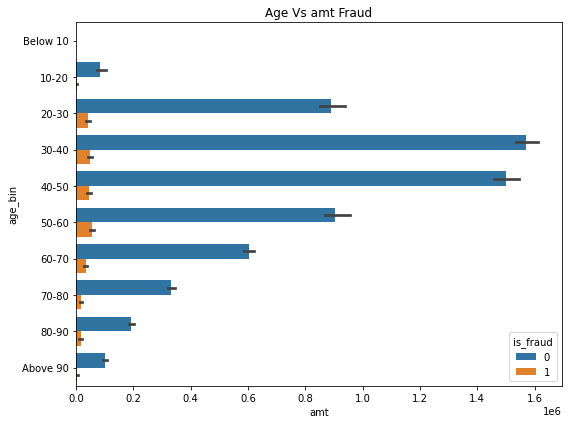

In [ ]:
# Age Bin Plot
plt.rcParams["figure.figsize"] = (8,6)
sns.barplot(y='age_bin',x='amt',hue='is_fraud',data = data_age, estimator=np.sum)
plt.title('Age Vs amt Fraud')
plt.tight_layout()
plt.show()


The above plot shows that the people of the age between 20 to 60 are the people who are a lot likely to commit a high amount fraudulent transaction.

**Creating Dependent and independent features**

In [ ]:
columns = df_train.columns.tolist()

# removing the dependent feature is_fraud
columns = [c for c in columns if c not in ["is_fraud"]]

X_train = df_train[columns]
Y_train = df_train['is_fraud']
X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(64834, 16) (64834,) (27786, 16) (27786,)


**Converting categorical features to numerical features using one-hot encoding**

In [ ]:
# concanating the datasets so that number of columns remain the same in both the data sets
final_df = pd.concat([X_train,X_test],axis=0)
final_df.shape

(92620, 16)

In [ ]:
# creating the list of categorical variables
categorical_features =[feature for feature in final_df.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [ ]:
#observing the unique values in each feature
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(final_df[feature].unique())))

Distinct categories for merchant  are 693
Distinct categories for category  are 14
Distinct categories for gender  are 2
Distinct categories for street  are 938
Distinct categories for city  are 860
Distinct categories for state  are 51
Distinct categories for job  are 483


In [ ]:
# function to convert categorical variables to one hot encoding
def category_onehot_encoding(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1             
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [ ]:
# applying the one hot encoding
final_df  = category_onehot_encoding(final_df, categorical_features)

merchant
category
gender
street
city
state
job


In [ ]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(92620, 3043)

In [ ]:
#splitting the train and test dataset back
X_train=final_df.iloc[:64834,:]
X_test=final_df.iloc[64834:,:]
print(X_train.shape,X_test.shape)

(64834, 3043) (27786, 3043)


In [ ]:
X_train1= X_train

**Checking for outliers**

In [ ]:
# Checking for outliers in the continuous variables
num_fraud1 = X_train[['amt','city_pop','age']]
num_fraud2 = X_test[['amt','city_pop','age']]

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_fraud1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age
count,64834.000000,6.483400e+04,64834.000000
mean,69.540880,8.853439e+04,47.655088
std,148.356837,3.026767e+05,17.349921
min,1.000000,2.300000e+01,16.000000
25%,9.590000,7.410000e+02,34.000000
50%,47.290000,2.443000e+03,46.000000
75%,83.040000,2.032800e+04,59.000000
90%,136.871000,1.861400e+05,72.000000
95%,195.443500,5.184290e+05,82.000000
99%,539.568100,1.577385e+06,93.000000


In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_fraud2.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age
count,27786.000000,2.778600e+04,27786.000000
mean,69.894569,9.111106e+04,47.532210
std,181.028553,3.107636e+05,17.435645
min,1.000000,2.300000e+01,16.000000
25%,9.670000,7.430000e+02,34.000000
50%,46.590000,2.435000e+03,46.000000
75%,82.690000,1.968500e+04,59.000000
90%,135.655000,1.901780e+05,72.000000
95%,193.995000,5.451470e+05,81.000000
99%,528.560000,1.580147e+06,93.000000


There are outliers present in "amt" and "city_pop" column which needs to be capped.

**Capping of outliers**

In [ ]:
# Capping outliers at 1% and 99%
num_col= ['amt', 'city_pop', 'age']


In [ ]:
X_train.shape

(64834, 3043)

In [ ]:
#capping outliers for train dataset
for col in X_train.columns:
    if col in num_col:
        percentiles = X_train[col].quantile([0.01,0.99]).values
        X_train[col][X_train[col] <= percentiles[0]] = percentiles[0]
        X_train[col][X_train[col] >= percentiles[1]] = percentiles[1]

In [ ]:
#checking if the outliers are properly handled
X_train[['amt','city_pop','age']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age
count,64834.000000,6.483400e+04,64834.000000
mean,64.963676,8.206015e+04,47.648718
std,81.686390,2.538875e+05,17.295864
min,1.250000,5.300000e+01,18.000000
25%,9.590000,7.410000e+02,34.000000
50%,47.290000,2.443000e+03,46.000000
75%,83.040000,2.032800e+04,59.000000
90%,136.871000,1.861400e+05,72.000000
95%,195.443500,5.184290e+05,82.000000
99%,539.473027,1.577385e+06,93.000000


In [ ]:
#capping outliers for test dataset
for col in X_test.columns:
    if col in num_col:
        percentiles = X_test[col].quantile([0.01,0.99]).values
        X_test[col][X_test[col] <= percentiles[0]] = percentiles[0]
        X_test[col][X_test[col] >= percentiles[1]] = percentiles[1]

In [ ]:
#checking if the outliers are properly handled
X_test[['amt','city_pop','age']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age
count,27786.000000,2.778600e+04,27786.000000
mean,64.243646,8.442694e+04,47.526884
std,79.611986,2.621420e+05,17.382736
min,1.240000,5.300000e+01,18.000000
25%,9.670000,7.430000e+02,34.000000
50%,46.590000,2.435000e+03,46.000000
75%,82.690000,1.968500e+04,59.000000
90%,135.655000,1.901780e+05,72.000000
95%,193.995000,5.451470e+05,81.000000
99%,528.330500,1.577799e+06,93.000000


**Splitting data into train and validation set**

In [ ]:
X_train.shape, Y_train.shape

((64834, 3043), (64834,))

In [ ]:
print(np.sum(Y_train))
print(np.sum(Y_test))

351
130


In [ ]:
print(Y_train.value_counts(),"\n","\n",Y_test.value_counts())

0    64483
1      351
Name: is_fraud, dtype: int64 
 
 0    27656
1      130
Name: is_fraud, dtype: int64


In [ ]:
# files for testing on models
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(64834, 3043) (27786, 3043) (64834,) (27786,)


In [ ]:
351/64834

0.005413826078909214

From the above it can be seen that the data is highly skewed as only 0.5% of the trained dataset contains Class 1 data. Thus we need to handle imbalance and then apply the model evaluations.

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
#scaling the train dataset
X_train[['amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','age']] = scaler.fit_transform(X_train[['amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','age']])

X_train.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age
94102,fraud_Funk Group,grocery_net,-0.550447,F,31701 Tucker Square Suite 893,Wilton,ND,0.368580,1.710072,-0.776984,-0.318530,"Designer, ceramics/pottery",-1.486655,1.546692,-0.704710,1.465754
198791,"fraud_Prosacco, Kreiger and Kovacek",home,2.692224,F,79209 Gary Dale,Colton,WA,1.875713,1.595284,-1.971836,-0.320220,Chief Marketing Officer,-1.165799,1.407133,-1.993181,1.754842
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,-0.733221,F,034 Kimberly Mountains,Brandon,FL,-0.563535,-2.087694,0.572780,-0.009639,Environmental consultant,1.632689,-2.211065,0.595789,-0.268778
619078,fraud_Conroy-Emard,food_dining,-0.239744,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,-0.693709,-0.877776,0.426353,0.328872,Prison officer,-0.078485,-0.778591,0.493766,-1.367315
573850,fraud_Adams-Barrows,health_fitness,-0.458387,M,09419 Lewis Rapids,Bay City,MI,0.001482,1.006067,0.451914,-0.055939,Water quality scientist,-0.211886,0.886115,0.483047,-1.251680


In [ ]:
#scaling the test dataset
X_test[['amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','age']] = scaler.fit_transform(X_test[['amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','age']])


**Model building**

First we apply the model without handling the imbalance. We will use Logistic Regression and Decision Tree classifier

**Logistic Regression**

In [ ]:
model_LR = LogisticRegression(random_state=137)
model_LR.fit(X_train,Y_train)
y_pred = model_LR.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_LR.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.8718998242139695

**AUROC for Logistic regression model is 87.2%**



In [ ]:
#Let's evaluate our model 
def print_eval(y_pred):
  print ('Accuracy: ', accuracy_score(Y_test, y_pred))
  print ('F1 score: ', f1_score(Y_test, y_pred))
  print ('Recall: ', recall_score(Y_test, y_pred))
  print ('Precision: ', precision_score(Y_test, y_pred))
  print ('\n clasification report:\n', classification_report(Y_test,y_pred))
  print ('\n confussion matrix:\n',confusion_matrix(Y_test, y_pred))


In [ ]:
# Logistic Regression Classification results without balancing class
print_eval(y_pred)

Accuracy:  0.9949614913985461
F1 score:  0.05405405405405406
Recall:  0.03076923076923077
Precision:  0.2222222222222222

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.22      0.03      0.05       130

    accuracy                           0.99     27786
   macro avg       0.61      0.52      0.53     27786
weighted avg       0.99      0.99      0.99     27786


 confussion matrix:
 [[27642    14]
 [  126     4]]


**The recall for the logistic regression with imbalanced data is 0.03**

**Random Forest**

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, Y_train)
y_pred = model_RF.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_RF.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.8927966667408379

**AUROC for Random Forest model is 89.2%**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9952853955229252
F1 score:  0.015037593984962405
Recall:  0.007692307692307693
Precision:  0.3333333333333333

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.33      0.01      0.02       130

    accuracy                           1.00     27786
   macro avg       0.66      0.50      0.51     27786
weighted avg       0.99      1.00      0.99     27786


 confussion matrix:
 [[27654     2]
 [  129     1]]


**The recall for the Random Forest with imbalanced data is only 0.007**

**Decision Tree**

In [ ]:
# decision tree
decision_tree_model = DecisionTreeClassifier(random_state=137)
decision_tree_model.fit(X_train,Y_train)
y_pred = decision_tree_model.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = decision_tree_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.7295579203845042

**AUROC for Decision Tree model is 72.9%**




In [ ]:
# Decision Tree Classification results without balancing class
print_eval(y_pred)

Accuracy:  0.9950694594400058
F1 score:  0.46692607003891057
Recall:  0.46153846153846156
Precision:  0.47244094488188976

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.47      0.46      0.47       130

    accuracy                           1.00     27786
   macro avg       0.73      0.73      0.73     27786
weighted avg       1.00      1.00      1.00     27786


 confussion matrix:
 [[27589    67]
 [   70    60]]


**Here the accuracy is not taken into account as it is misleading.
We want to get maximum True Negatives i.e we want to predict the Fraud tranactions with maximum accuracy. This can be done by monitoring the Recall.**

**We want the recall of class 1 to be close to 1.00
We can also use f1-score as a metric to observe** 

**The dataset is imbalanced. We need to treat it in the first place using the 'SMOTE' oversampling technique.**

**Model Building with balancing classes**

**Implementing Random Under Sampling**

In [ ]:
# adding the dependent feature in the train data set
print(Y_train.shape,X_train.shape)
X_train1 = pd.concat([X_train,Y_train],axis = 1)
X_train1.shape

(64834,) (64834, 3043)


(64834, 3044)

In [ ]:
# Class count
count_class_0, count_class_1 = X_train1.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = X_train1[X_train1['is_fraud'] == 0]
df_class_1 = X_train1[X_train1['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

64483 351
(64483, 3044) (351, 3044)


In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
X_train_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(X_train_under_sample.is_fraud.value_counts())

Random under-sampling:
1    351
0    351
Name: is_fraud, dtype: int64


**Logistic Regression with Under Sampling**

In [ ]:
X = X_train_under_sample.drop('is_fraud',axis='columns')
y = X_train_under_sample['is_fraud']

In [ ]:
model_LR_under_sample = LogisticRegression(random_state=137)
model_LR_under_sample.fit(X,y)
y_pred = model_LR_under_sample.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_LR_under_sample.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.8945066865445807

**AUROC for Logistic regression whith under sampling model is 89.5%**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9058518678471172
F1 score:  0.07102272727272728
Recall:  0.7692307692307693
Precision:  0.03723008190618019

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     27656
           1       0.04      0.77      0.07       130

    accuracy                           0.91     27786
   macro avg       0.52      0.84      0.51     27786
weighted avg       0.99      0.91      0.95     27786


 confussion matrix:
 [[25070  2586]
 [   30   100]]


**The recall for the logistic regression with under sampling is better than the above models with 0.76**

**Decision tree with undersampling**

In [ ]:
model_DT_undersample = DecisionTreeClassifier(random_state=137)
model_DT_undersample.fit(X,y)
y_pred = model_DT_undersample.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_DT_undersample.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.9439912885783583

**AUROC for Decision Tree with under sampling model is 94.3%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9189879795580508
F1 score:  0.10067918497802637
Recall:  0.9692307692307692
Precision:  0.05309734513274336

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     27656
           1       0.05      0.97      0.10       130

    accuracy                           0.92     27786
   macro avg       0.53      0.94      0.53     27786
weighted avg       1.00      0.92      0.95     27786


 confussion matrix:
 [[25409  2247]
 [    4   126]]


**The recall for the decision tree with under sampling is the highest among the above models with 0.96 , very close to 1.00**

**Random Forest with UnderSampling**

In [ ]:
model_RF_undersample = RandomForestClassifier(random_state=137)
model_RF_undersample.fit(X,y)
y_pred = model_RF_undersample.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_RF_undersample.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.8839663392002848

**AUROC for Random Forest with under sampling model is 88.4%**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9355070899013892
F1 score:  0.09859154929577467
Recall:  0.7538461538461538
Precision:  0.0527448869752422

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     27656
           1       0.05      0.75      0.10       130

    accuracy                           0.94     27786
   macro avg       0.53      0.85      0.53     27786
weighted avg       0.99      0.94      0.96     27786


 confussion matrix:
 [[25896  1760]
 [   32    98]]


**The recall for the random forest with under sampling is 0.75 which is pretty good.**

**Implementing Random Over Sampling**

In [ ]:
# adding the dependent feature in the train data set
print(Y_train.shape,X_train.shape)
X_train2 = pd.concat([X_train,Y_train],axis = 1)
X_train2.shape

(64834,) (64834, 3043)


(64834, 3044)

In [ ]:
count_class_0, count_class_1 = X_train2.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
X_class_0 = X_train2[X_train2['is_fraud'] == 0]
X_class_1 = X_train2[X_train2['is_fraud'] == 1]
print(X_class_0.shape,X_class_1.shape)

64483 351
(64483, 3044) (351, 3044)


In [ ]:
# Oversample 1-class and concat the DataFrames of both class
X_class_1_over = X_class_1.sample(count_class_0,replace=True)
X_train_over_sample = pd.concat([X_class_0, X_class_1_over], axis=0)

print('Random over-sampling:')

print(X_train_over_sample.is_fraud.value_counts())

Random over-sampling:
1    64483
0    64483
Name: is_fraud, dtype: int64


**Logistic Regression with Over Sampling**



In [ ]:
X = X_train_over_sample.drop('is_fraud',axis='columns')
y = X_train_over_sample['is_fraud']

In [ ]:
model_LR_over_sample = LogisticRegression(random_state=137)
model_LR_over_sample.fit(X,y)
y_pred = model_LR_over_sample.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_LR_over_sample.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.8484479651098108

**AUROC for Logistic regression model with over sampling is 84.8%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9723961707334629
F1 score:  0.12142038946162659
Recall:  0.4076923076923077
Precision:  0.07133243606998654

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     27656
           1       0.07      0.41      0.12       130

    accuracy                           0.97     27786
   macro avg       0.53      0.69      0.55     27786
weighted avg       0.99      0.97      0.98     27786


 confussion matrix:
 [[26966   690]
 [   77    53]]


**The recall for this model is also of only 0.41**



**Decision tree with oversampling**

In [ ]:
model_DT_oversample = DecisionTreeClassifier(random_state=137)
model_DT_oversample.fit(X,y)
y_pred = model_DT_oversample.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_DT_oversample.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.6940928105738634

**AUROC for Decision Tree with over sampling is 69.4%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9930540559994242
F1 score:  0.3457627118644068
Recall:  0.3923076923076923
Precision:  0.3090909090909091

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.31      0.39      0.35       130

    accuracy                           0.99     27786
   macro avg       0.65      0.69      0.67     27786
weighted avg       0.99      0.99      0.99     27786


 confussion matrix:
 [[27542   114]
 [   79    51]]


**The recall for this model is also of only 0.39**

**Random Forest with OverSampling**

In [ ]:
model_RF_oversample = RandomForestClassifier(random_state=137)
model_RF_oversample.fit(X,y)
y_pred = model_RF_oversample.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_RF_oversample.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.9157414721523776

**AUROC for Random Forest with over sampling is 91.5%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9952134168286187
F1 score:  0.06993006993006992
Recall:  0.038461538461538464
Precision:  0.38461538461538464

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.38      0.04      0.07       130

    accuracy                           1.00     27786
   macro avg       0.69      0.52      0.53     27786
weighted avg       0.99      1.00      0.99     27786


 confussion matrix:
 [[27648     8]
 [  125     5]]


**The recall for this model is of only 0.38**

**Implementing Smote**

In [ ]:
# smote implementation
smote = SMOTE(random_state=45, k_neighbors=5)
X_sm, y_sm = smote.fit_resample(X_train, Y_train)

In [ ]:
from collections import Counter 
print(sorted(Counter(y_sm).items()))

[(0, 64483), (1, 64483)]


**Logistic Regression with SMOTE**

In [ ]:
model_LR_smote = LogisticRegression(random_state=137)
model_LR_smote.fit(X_sm,y_sm)
y_pred = model_LR_smote.predict(X_test)

In [ ]:
#for test dataset
pred_probs_test = model_LR_smote.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.8538731336641374

**AUROC for Logistic Regression with SMOTE is 85.4%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9720722666090837
F1 score:  0.12612612612612611
Recall:  0.4307692307692308
Precision:  0.07387862796833773

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     27656
           1       0.07      0.43      0.13       130

    accuracy                           0.97     27786
   macro avg       0.54      0.70      0.56     27786
weighted avg       0.99      0.97      0.98     27786


 confussion matrix:
 [[26954   702]
 [   74    56]]


**The Recall for Logistic Regression with SMOTE is 0.43 only.**

**Logistic Regression with Smote(With Feature selection)**

In [ ]:
# Using Lasso to select the features
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_sm, y_sm)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso_LR = svc_model.transform(X_sm)
position = svc_model.get_support(indices=True)

print(X_lasso_LR.shape)
print(position)

(128966, 27)
[   0    2    4    5    8  111  702  703  704  707  708  711  712  713
  714 1490 2031 2514 2527 2534 2544 2545 2548 2550 2553 2600 2631]


In [ ]:
model_LR_smote_lasso = LogisticRegression(random_state=137)
model_LR_smote_lasso.fit(X_lasso_LR,y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=137, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Model predictions
X_test1 = pd.DataFrame(data=X_test).iloc[:, position]
y_pred = model_LR_smote_lasso.predict(X_test1)

In [ ]:
#for test dataset
pred_probs_test = model_LR_smote_lasso.predict_proba(X_test1)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.9023706081306603

**AUROC for Logistic Regression with SMOTE wit Feauture Selection is 90.2%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9133016627078385
F1 score:  0.0773649942550747
Recall:  0.7769230769230769
Precision:  0.04070939137444579

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     27656
           1       0.04      0.78      0.08       130

    accuracy                           0.91     27786
   macro avg       0.52      0.85      0.52     27786
weighted avg       0.99      0.91      0.95     27786


 confussion matrix:
 [[25276  2380]
 [   29   101]]


**The Recall for Logistic Regression with SMOTE with feature selection is 0.78.**

**Decision Tree with SMOTE**

In [ ]:
# Using Lasso to select the features
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_sm, y_sm)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_sm)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(128966, 27)
[   0    2    4    5    8  111  702  703  704  707  708  711  712  713
  714 1490 2031 2514 2527 2534 2544 2545 2548 2550 2553 2600 2631]


In [ ]:
model_DT_smote = DecisionTreeClassifier(random_state=137)
model_DT_smote.fit(X_lasso,y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=137, splitter='best')

In [ ]:
# Model predictions
X_test1 = pd.DataFrame(data=X_test).iloc[:, position]
y_pred = model_DT_smote.predict(X_test1)

In [ ]:
#for test dataset
pred_probs_test = model_DT_smote.predict_proba(X_test1)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.7723490242762734

In [ ]:
print('Decision Tree - Recall :',recall_score(Y_test, y_pred))

Decision Tree - Recall : 0.5538461538461539


In [ ]:
scorers = {'recall_score': make_scorer(recall_score)}
refit_score = 'recall_score'

**AUROC for Decision Tree with SMOTE is 77.3%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9888073130353415
F1 score:  0.31648351648351647
Recall:  0.5538461538461539
Precision:  0.22153846153846155

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     27656
           1       0.22      0.55      0.32       130

    accuracy                           0.99     27786
   macro avg       0.61      0.77      0.66     27786
weighted avg       0.99      0.99      0.99     27786


 confussion matrix:
 [[27403   253]
 [   58    72]]


**The Recall for Decision Tree with SMOTE is 0.55.**

**Decision Tree with Smote (Hyperparameter Tuning)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

In [ ]:
# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)

In [ ]:
tree.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=100,
           

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,0.102238,0.001734,0.010075,0.000404,1,{'max_depth': 1},0.788788,0.788229,0.795053,0.790339,0.789176,0.790317,0.002467,4,0.790738,0.790878,0.789172,0.790389,0.790602,0.790356,0.000614
1,0.727447,0.002393,0.010197,0.000134,11,{'max_depth': 11},0.972319,0.979529,0.979451,0.976894,0.977824,0.977203,0.002638,3,0.978521,0.977688,0.977242,0.977765,0.977688,0.977781,0.000414
2,0.981029,0.013822,0.010659,0.000075,21,{'max_depth': 21},0.993875,0.997906,0.999069,0.996046,0.997674,0.996914,0.001800,2,0.999457,0.998992,0.999341,0.997383,0.998876,0.998810,0.000745
3,1.053103,0.010286,0.010798,0.000141,31,{'max_depth': 31},0.991781,0.998914,0.998682,0.998449,0.998217,0.997209,0.002724,1,0.999961,0.999981,0.999981,1.000000,1.000000,0.999984,0.000015


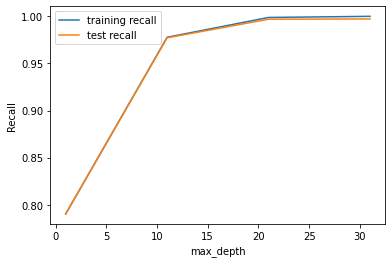

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_recall_score"], 
         label="training recall")
plt.plot(score["param_max_depth"], 
         score["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

**max_depth should be in the range (20,30)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

In [ ]:
# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)

In [ ]:
tree.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=100,
           

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.042190,0.037979,0.010866,0.000484,5,{'min_samples_leaf': 5},0.990851,0.995968,0.996976,0.996588,0.996588,0.995394,0.002295,1,0.997635,0.997596,0.997480,0.997461,0.997170,0.997468,0.000163
1,0.913542,0.037652,0.010787,0.000121,25,{'min_samples_leaf': 25},0.988214,0.990462,0.992013,0.989067,0.991781,0.990308,0.001485,2,0.993041,0.991761,0.992227,0.991122,0.992731,0.992176,0.000684
2,0.783140,0.007909,0.010565,0.000119,45,{'min_samples_leaf': 45},0.982864,0.985189,0.985887,0.982864,0.985733,0.984508,0.001362,3,0.986469,0.986489,0.986566,0.985655,0.986779,0.986392,0.000384
3,0.781034,0.010042,0.010683,0.000139,65,{'min_samples_leaf': 65},0.979530,0.983716,0.982553,0.981934,0.979918,0.981530,0.001587,4,0.983096,0.983077,0.983310,0.983639,0.981487,0.982922,0.000745
4,0.780580,0.028242,0.011053,0.000531,85,{'min_samples_leaf': 85},0.978677,0.979141,0.979606,0.983174,0.981158,0.980351,0.001640,5,0.981972,0.978832,0.980228,0.984027,0.982767,0.981565,0.001840


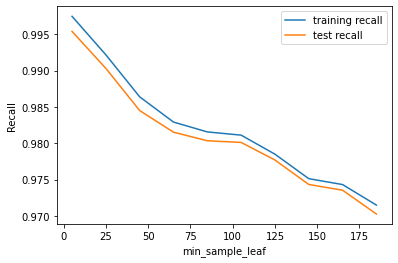

In [ ]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_recall_score"], 
         label="training recall")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_sample_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

**min_sample_leaf should be in the range (25,175)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

In [ ]:
# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                   return_train_score=True)

In [ ]:
tree.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=100,
           

In [ ]:
# grid search results
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,1.066933,0.011619,0.010854,0.000106,5,{'min_samples_split': 5},0.991238,0.998294,0.997984,0.997519,0.997751,0.996557,0.002672,1,0.999845,0.999341,0.999302,0.999399,0.999360,0.999449,0.000200
1,1.065296,0.011940,0.010842,0.000128,25,{'min_samples_split': 25},0.987827,0.997441,0.996821,0.996046,0.996123,0.994851,0.003549,2,0.997790,0.998139,0.997306,0.997286,0.996801,0.997464,0.000460
2,1.079356,0.017383,0.010824,0.000077,45,{'min_samples_split': 45},0.987516,0.996588,0.995270,0.995115,0.995270,0.993952,0.003262,3,0.996879,0.997461,0.996026,0.995832,0.995580,0.996356,0.000704
3,1.077872,0.019119,0.010911,0.000086,65,{'min_samples_split': 65},0.986896,0.994417,0.993176,0.992556,0.993254,0.992060,0.002651,4,0.996026,0.995115,0.993312,0.994068,0.994068,0.994518,0.000948
4,1.079656,0.006751,0.010923,0.000059,85,{'min_samples_split': 85},0.986276,0.992788,0.992323,0.991781,0.992556,0.991145,0.002457,5,0.994863,0.993196,0.992750,0.992634,0.993545,0.993397,0.000802


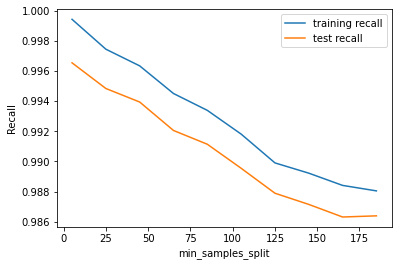

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

**min_samples_split should be in the range (0,150)**



In [ ]:
# Create the parameter grid 
param = {
    'max_depth': range(20, 30, 5),
    'min_samples_leaf': range(25, 175, 25),
    'min_samples_split': range(0, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

In [ ]:
# Instantiate the random search model
dtree = DecisionTreeClassifier()
randomized_search = RandomizedSearchCV(estimator = dtree, param_distributions = param, refit=refit_score,
                          cv = n_folds, verbose = 1, n_jobs = -1)

In [ ]:
# Fit the randomised search to the data
randomized_search.fit(X_lasso, y_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
# cv results
cv_results = pd.DataFrame(randomized_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", randomized_search.best_score_)

Best Accuracy 0.9814369793620049


In [ ]:
dt_best= randomized_search.best_estimator_
print(dt_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=25, 
                                  min_samples_leaf=75,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred = clf_gini.predict(X_test1)

In [ ]:
#for test dataset
pred_probs_test = clf_gini.predict_proba(X_test1)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.9142400591887141

**The AUROC score of Decision Tree with Hyper Parameter Tuning is 91.4%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9784063917080544
F1 score:  0.2555831265508685
Recall:  0.7923076923076923
Precision:  0.15236686390532544

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     27656
           1       0.15      0.79      0.26       130

    accuracy                           0.98     27786
   macro avg       0.58      0.89      0.62     27786
weighted avg       1.00      0.98      0.99     27786


 confussion matrix:
 [[27083   573]
 [   27   103]]


**The Recall for Decision Tree with SMOTE with hyper parameter tuning is 0.79, slightly higher than Logistic Regression model with Smote with feature selection.**

**Random Forest with Smote (with Default Parameters)**

In [ ]:
# Using Lasso to select the features
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_sm, y_sm)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_sm)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(128966, 27)
[   0    2    4    5    8  111  702  703  704  707  708  711  712  713
  714 1490 2031 2514 2527 2534 2544 2545 2548 2550 2553 2600 2631]


In [ ]:
# feature vector for decision tree
lasso_features = list(X_train.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['amt', 'lat', 'city_pop', 'unix_time', 'age', 'fraud_Conroy-Cruickshank', 'gas_transport', 'grocery_net', 'grocery_pos', 'kids_pets', 'misc_net', 'shopping_net', 'shopping_pos', 'travel', 'M', '81708 Christopher Plaza', 'Jordanville', 'CA', 'KY', 'MO', 'NY', 'OH', 'PA', 'SC', 'TX', 'Audiological scientist', 'Chief Executive Officer']


In [ ]:
model_RF_smote = RandomForestClassifier(random_state=137)
model_RF_smote.fit(X_lasso,y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=137,
                       verbose=0, warm_start=False)

In [ ]:
# Model predictions
X_test2 = pd.DataFrame(data=X_test).iloc[:, position]
y_pred = model_RF_smote.predict(X_test2)

In [ ]:
#for test dataset
pred_probs_test = model_RF_smote.predict_proba(X_test2)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.950739163570014

**AUROC for Random Forest with SMOTE is 95.07%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9950334700928525
F1 score:  0.5106382978723405
Recall:  0.5538461538461539
Precision:  0.47368421052631576

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.47      0.55      0.51       130

    accuracy                           1.00     27786
   macro avg       0.74      0.78      0.75     27786
weighted avg       1.00      1.00      1.00     27786


 confussion matrix:
 [[27576    80]
 [   58    72]]


**The Recall for Random Forest with SMOTE is 0.55**



**Random Forest with Smote (Hyper Parameter Tuning)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 40, 10)}

# instantiate the model
model_RF_smote_HT = RandomForestClassifier()

In [ ]:
# fit tree on training data
rf_HT = RandomizedSearchCV(model_RF_smote_HT, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)

In [ ]:
rf_HT.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# scores of RandomizedSearch CV
scores = rf_HT.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,3.063481,0.070699,0.121415,0.000961,2,{'max_depth': 2},0.788943,0.789159,0.793967,0.790416,0.789331,0.790363,0.001872,4,0.790893,0.791982,0.788164,0.790699,0.790699,0.790487,0.001256
1,10.638298,0.225424,0.222884,0.004114,12,{'max_depth': 12},0.973095,0.977512,0.972782,0.975886,0.974645,0.974784,0.001763,3,0.977533,0.977417,0.971136,0.977416,0.974218,0.975544,0.002536
2,13.139959,0.076350,0.284511,0.002327,22,{'max_depth': 22},0.991393,0.996743,0.997131,0.996511,0.996588,0.995673,0.002151,2,0.997577,0.997247,0.997965,0.997441,0.997480,0.997542,0.000237
3,13.634637,0.231825,0.301871,0.005596,32,{'max_depth': 32},0.994030,1.000000,0.999922,0.999922,0.999922,0.998759,0.002365,1,1.000000,1.000000,0.999981,1.000000,1.000000,0.999996,0.000008


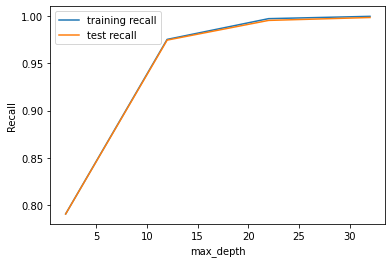

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

**max_depth should be in the range (20,30)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 600)}

# instantiate the model
model_RF_smote_HT = RandomForestClassifier(max_depth= 20)

In [ ]:
# fit tree on training data
rf_HT = RandomizedSearchCV(model_RF_smote_HT, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)

In [ ]:
rf_HT.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=20,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                 

In [ ]:
# scores of RandomizedSearch CV
scores = rf_HT.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,12.944403,0.016859,0.280206,0.004241,100,{'n_estimators': 100},0.986896,0.993099,0.992401,0.993332,0.991703,0.991486,0.002365,1,0.992440,0.993855,0.992847,0.994495,0.992828,0.993293,0.000762
1,91.026529,0.654342,1.899119,0.017879,700,{'n_estimators': 700},0.986819,0.992323,0.991548,0.990773,0.991936,0.990680,0.001997,3,0.992362,0.992789,0.992382,0.992130,0.992595,0.992451,0.000224
2,168.425646,0.455890,3.567037,0.104704,1300,{'n_estimators': 1300},0.987206,0.992246,0.991935,0.990851,0.991238,0.990695,0.001813,2,0.992905,0.992789,0.992614,0.992091,0.992013,0.992483,0.000364


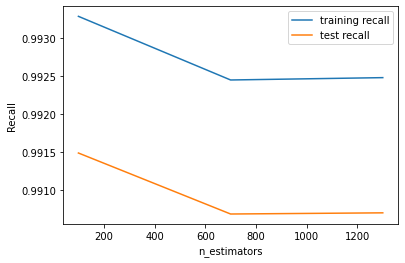

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

**n_estimators should be in the range (200,800)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
model_RF_smote_HT = RandomForestClassifier()

In [ ]:
# fit tree on training data
rf_HT = RandomizedSearchCV(model_RF_smote_HT, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)

In [ ]:
rf_HT.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# scores of RandomizedSearch CV
scores = rf_HT.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,11.011935,0.082355,0.247058,0.001930,100,{'min_samples_leaf': 100},0.973637,0.976659,0.978365,0.976584,0.977747,0.976599,0.001626,1,0.977591,0.975924,0.977940,0.977785,0.976874,0.977223,0.000745
1,10.065356,0.072254,0.235352,0.002637,200,{'min_samples_leaf': 200},0.961697,0.966579,0.963942,0.962394,0.963868,0.963696,0.001679,2,0.965029,0.965282,0.962781,0.964138,0.962296,0.963905,0.001189
2,9.560575,0.157744,0.223897,0.001509,300,{'min_samples_leaf': 300},0.946189,0.949674,0.947426,0.951927,0.954641,0.949971,0.003050,3,0.951479,0.948902,0.945102,0.953321,0.953844,0.950530,0.003218


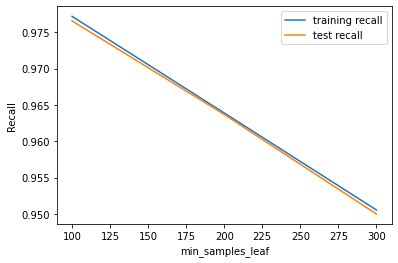

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

**min_samples_leaf should be in the range (150,250)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10,15,20]}

# instantiate the model
model_RF_smote_HT = RandomForestClassifier(max_depth=20)

In [ ]:
# fit tree on training data
rf_HT = RandomizedSearchCV(model_RF_smote_HT, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)

In [ ]:
rf_HT.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=20,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                 

In [ ]:
# scores of RandomizedSearch CV
scores = rf_HT.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,22.292276,0.252267,0.258965,0.002731,10,{'max_features': 10},0.994262,0.998217,0.998604,0.998217,0.998294,0.997519,0.001635,3,0.999244,0.998759,0.999070,0.998934,0.998876,0.998976,0.000167
1,33.805451,0.226267,0.253702,0.002336,15,{'max_features': 15},0.994262,0.998759,0.998759,0.998449,0.998682,0.997782,0.001764,1,0.999399,0.999186,0.999225,0.999011,0.999186,0.999201,0.000123
2,45.669651,0.284752,0.250819,0.001114,20,{'max_features': 20},0.994340,0.998604,0.998837,0.998527,0.998604,0.997782,0.001724,2,0.999302,0.999089,0.999186,0.999128,0.999147,0.999170,0.000073


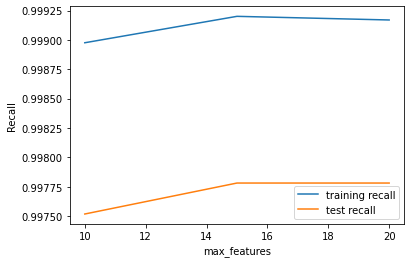

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

**max_features should be in the range (10,20)**

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 100)}

# instantiate the model
model_RF_smote_HT = RandomForestClassifier()

In [ ]:
# fit tree on training data
rf_HT = RandomizedSearchCV(model_RF_smote_HT, parameters, 
                    cv=n_folds, 
                   scoring=scorers,refit = refit_score,
                  return_train_score=True)

In [ ]:
rf_HT.fit(X_lasso, y_sm)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# scores of RandomizedSearch CV
scores = rf_HT.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,13.081895,0.190137,0.281662,0.002192,200,{'min_samples_split': 200},0.985811,0.990695,0.991703,0.988447,0.990540,0.989439,0.002101,1,0.991723,0.989881,0.991025,0.990211,0.989629,0.990494,0.000774
1,12.989711,0.128469,0.275938,0.001556,300,{'min_samples_split': 300},0.982244,0.986430,0.986818,0.984648,0.986431,0.985314,0.001710,2,0.986256,0.985016,0.985054,0.986779,0.986004,0.985822,0.000690
2,12.898519,0.138287,0.273205,0.001870,400,{'min_samples_split': 400},0.979685,0.984181,0.985965,0.982089,0.984415,0.983267,0.002175,3,0.984395,0.982748,0.984647,0.983174,0.984453,0.983883,0.000770


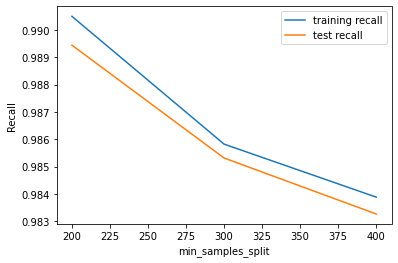

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_recall_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_recall_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

**min_samples_split should be in the range (275,375)**

In [ ]:
# Create the parameter grid 
param = {
    'max_depth': range(20, 30, 10),
    'min_samples_leaf': range(150, 250, 100),
    'min_samples_split': range(275, 375, 100),
    'n_estimators': [200,300,800], 
    'max_features': [10,20]
}

n_folds = 5

In [ ]:
# Instantiate the random search model
model_RF_smote_HT = RandomForestClassifier()
randomized_search = RandomizedSearchCV(estimator = model_RF_smote_HT, param_distributions = param, refit=refit_score,
                          cv = n_folds, verbose = 1, n_jobs = -1)

In [ ]:
# Fit the randomised search to the data
randomized_search.fit(X_lasso, y_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 22.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# cv results
cv_results = pd.DataFrame(randomized_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", randomized_search.best_score_)

Best Accuracy 0.9761099860175033


In [ ]:
rf_best= randomized_search.best_estimator_
print(rf_best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=275,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Final RF Model with features selected from Lasso

model_rf = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=150, 
                             min_samples_split=275,
                             max_features=10,
                             n_estimators=800)
model_rf.fit(X_lasso, y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=275,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model_rf.predict(X_test2)

In [ ]:
#for test dataset
pred_probs_test = model_rf.predict_proba(X_test2)[:,1]
metrics.roc_auc_score(Y_test, pred_probs_test)

0.9673224338577245

**The AUROC score of Random Forest with Hyper Parameter Tuning is 96.7%.**

In [ ]:
print_eval(y_pred)

Accuracy:  0.9795940401641114
F1 score:  0.27586206896551724
Recall:  0.8307692307692308
Precision:  0.16539050535987748

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     27656
           1       0.17      0.83      0.28       130

    accuracy                           0.98     27786
   macro avg       0.58      0.91      0.63     27786
weighted avg       1.00      0.98      0.99     27786


 confussion matrix:
 [[27111   545]
 [   22   108]]


**The Recall for Random Forest with SMOTE with hyper parameter tuning is 0.83, which is best among the other two models- LogisticRegression and Decision Tree.**

**So, Random Forest gives the best recall which is the most important metric for our business problem.**

In [ ]:
rf_best.feature_importances_

array([6.57163653e-01, 9.52807588e-03, 6.38168939e-03, 5.98852578e-03,
       1.40865840e-02, 3.36818628e-03, 6.18897090e-02, 5.37726405e-03,
       2.15101672e-02, 4.39518550e-02, 1.97868531e-02, 4.52294246e-02,
       2.31981385e-03, 1.20968800e-02, 5.25745027e-02, 5.78141327e-03,
       5.60097566e-03, 6.33919520e-03, 3.81953552e-03, 3.43308862e-03,
       3.55530381e-03, 3.50768012e-03, 7.12252757e-04, 5.81225752e-04,
       9.29975058e-04, 3.23011451e-03, 1.25605584e-03])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": lasso_features,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.657164
6,gas_transport,0.061890
14,M,0.052575
11,shopping_net,0.045229
9,kids_pets,0.043952
8,grocery_pos,0.021510
10,misc_net,0.019787
4,age,0.014087
13,travel,0.012097
1,lat,0.009528


**CONCLUSION:**

**Random Forest is the model providing the highest recall. We choose recall as the main metric because we do not want a transaction which is fraud to be labelled as a non-fraudulent transaction i.e. we want to reduce the number of false negatives. False positives are still fine in our model as if we label a non fraudulent transaction as a fraudulent transaction despite it being not one, it will not lead to a significant impact on our business.**

**Cost Benefit Analysis**

Average number of transactions per month

In [ ]:
X_train.shape

(64834, 3964)

In [ ]:
X_test.shape

(27786, 3964)

In [ ]:
print("Average number of transaction per month:", 64834/12)

Average number of transaction per month: 5402.833333333333


Average number of fraudulent transactions per month

In [ ]:
Y_train.value_counts()

0    64483
1      351
Name: is_fraud, dtype: int64

In [ ]:
print("Average number of fraudulent transactions per month", 351/12)

Average number of fraudulent transactions per month 29.25


Average amount per fraudulent transaction

In [ ]:
sum= df_train['amt'][df_train['is_fraud'] == 1].sum()
sum

194541.82

In [ ]:
frauds=df_train['is_fraud'].value_counts()
frauds

0    64483
1      351
Name: is_fraud, dtype: int64

In [ ]:
print("Average amount per fraudulent transaction", 194541.82/351)

Average amount per fraudulent transaction 554.2501994301995
